<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [6]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [7]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [8]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [9]:
# Answer:
movies.loc[:,'duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [10]:
# Answer:
shortest_movie = movies.sort_values('duration').head(1)
longest_movie = movies.sort_values('duration').tail(1)
print(shortest_movie)
print(longest_movie)


     star_rating   title content_rating  genre  duration  \
389          8.0  Freaks        UNRATED  Drama        64   

                                           actors_list  
389  [u'Wallace Ford', u'Leila Hyams', u'Olga Bacla...  
     star_rating   title content_rating  genre  duration  \
476          7.8  Hamlet          PG-13  Drama       242   

                                           actors_list  
476  [u'Kenneth Branagh', u'Julie Christie', u'Dere...  


#### Create a histogram of duration, choosing an "appropriate" number of bins.

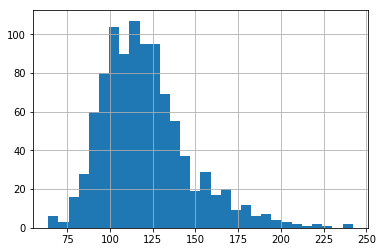

In [11]:
# Answer:
ax = movies.loc[:,'duration'].hist(bins=30)

#### Use a box plot to display that same data.

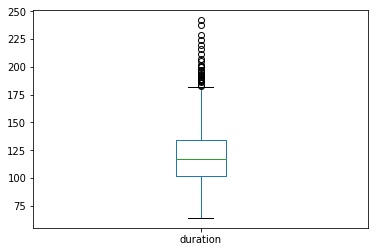

In [12]:
# Answer:
ax = movies.loc[:,'duration'].plot(kind='box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [13]:
# Answer:
movies.loc[:,'content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

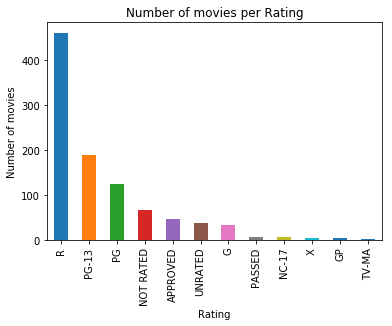

In [14]:
# Answer:
ax = movies.loc[:,'content_rating'].value_counts().plot(kind='bar')
ax.set_xlabel('Rating')
ax.set_ylabel('Number of movies')
ax.set_title('Number of movies per Rating');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [15]:
# Answer:
movies.content_rating.replace(['NOT RATED','APPROVED','PASSED','GP'], 'UNRATED')

0            R
1            R
2            R
3        PG-13
4            R
5      UNRATED
6      UNRATED
7        PG-13
8            R
9            R
10       PG-13
11       PG-13
12          PG
13       PG-13
14       PG-13
15       PG-13
16           R
17     UNRATED
18           R
19          PG
20           R
21           R
22     UNRATED
23           R
24           R
25       PG-13
26       PG-13
27           R
28           R
29     UNRATED
        ...   
949         PG
950          R
951          R
952          R
953         PG
954      PG-13
955          R
956         PG
957          R
958      PG-13
959          R
960      PG-13
961          R
962         PG
963          R
964      PG-13
965      PG-13
966      PG-13
967          R
968          R
969          R
970          R
971          R
972      NC-17
973      PG-13
974         PG
975         PG
976      PG-13
977         PG
978          R
Name: content_rating, Length: 979, dtype: object

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [16]:
# Answer:
movies.content_rating.replace(['X','TV-MA'],'NC-17')

0              R
1              R
2              R
3          PG-13
4              R
5      NOT RATED
6      NOT RATED
7          PG-13
8              R
9              R
10         PG-13
11         PG-13
12            PG
13         PG-13
14         PG-13
15         PG-13
16             R
17       UNRATED
18             R
19            PG
20             R
21             R
22      APPROVED
23             R
24             R
25         PG-13
26         PG-13
27             R
28             R
29        PASSED
         ...    
949           PG
950            R
951            R
952            R
953           PG
954        PG-13
955            R
956           PG
957            R
958        PG-13
959            R
960        PG-13
961            R
962           PG
963            R
964        PG-13
965        PG-13
966        PG-13
967            R
968            R
969            R
970            R
971            R
972        NC-17
973        PG-13
974           PG
975           PG
976        PG-

#### Count the number of missing values in each column.

In [47]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [52]:
# Answer:
missing = movies.loc[:,'content_rating'].isnull()
movies.loc[missing,:]
movies.loc[:,'content_rating'].fillna(value='UNRATED', inplace = True)



star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [59]:
# Answer:
avg_ge_2 = movies.loc[:,'duration'] > 120
avg_le_2 = movies.loc[:,'duration'] < 120 
print(movies.loc[avg_ge_2,'duration'].mean())
print(movies.loc[avg_le_2,'duration'].mean())

143.38532110091742
102.40571428571428


#### Use a visualization to detect whether there is a relationship between duration and star rating.

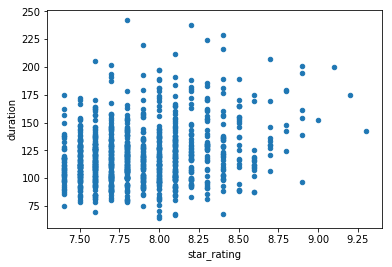

In [23]:
# Answer:
movies.plot(kind='scatter', x='star_rating', y='duration');

#### Calculate the average duration for each genre.

In [20]:
# Answer:
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

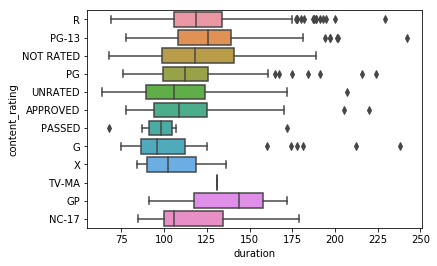

In [21]:
# Answer:
#Boxplot is a good way to visualize the relationshop because it shows the variance, median and average of duration for each rating
import seaborn as sns
sns.boxplot(y = 'content_rating', x = 'duration', data=movies);

#### Determine the top rated movie (by star rating) for each genre.

In [26]:
# Answer:
# finding the rows having the highest star rating in each genre
idx = movies.groupby('genre')['star_rating'].transform(max) == movies['star_rating']
movies[idx]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
25,8.6,Life Is Beautiful,PG-13,Comedy,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
29,8.6,City Lights,PASSED,Comedy,87,"[u'Charles Chaplin', u'Virginia Cherrill', u'F..."
30,8.6,Spirited Away,PG,Animation,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [24]:
# Answer:
#To check if there movies with the same title
title_count = movies.loc[:,'title'].value_counts()

#To make sure that Dracula is repeated multiple times
movies.loc[movies['title'] == 'Dracula']

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


**You only need to choose one of the options below.** However, solving for multiple options would count as "extra credit" that could e.g. raise your score from a 2 ("meets expectations") to a 3 ("exceeds expectations").

#### Option 1: manually create a list of relevant genres, then filter using that list

In [25]:
# Answer:
#To find the relevant genres
movies.loc[:,'genre'].value_counts()

#Filtering the relevant genres
movies.drop('duration',axis = 1).loc[movies.genre.isin(['Drama','Comedy','Action',
'Crime','Biography', 'Adventure','Animation','Horror','Mystery']),:].groupby('genre').mean()

,star_rating
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Horror,7.806897
Mystery,7.975000


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!